# Taller de Análisis de Texto con Tweets en Español

Este taller guía a los estudiantes en el análisis de tweets en español, usando técnicas de limpieza de texto, análisis de frecuencia de palabras y análisis de sentimientos. También incluye preguntas orientadas al negocio.

In [1]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv

--2025-05-26 18:44:37--  https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv [following]
--2025-05-26 18:44:38--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205292 (200K) [text/plain]
Saving to: ‘Gender_bias_spanish.csv’

Gender_bias_s

## 1. Configuración e Importación de Librerías
Primero, importaremos las librerías necesarias y cargaremos el conjunto de datos.

In [2]:
!pip install nltk textblob wordcloud
import pandas as pd
import re
from nltk.corpus import stopwords
from textblob import TextBlob
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Cargar el Conjunto de Datos
Cargamos el archivo CSV que contiene los tweets y las etiquetas ('biased' o 'non-biased').

In [3]:
# Cargar el conjunto de datos (reemplazar 'ruta/del/archivo.csv' con la ruta del archivo real)
tweets = pd.read_csv('Gender_bias_spanish.csv')
tweets.head()

,Contents,Label
0,@chumeltorres ya cabrón! sin tí se reciben las...,biased
1,¿alguien es tan amable de ir a hacerme la comp...,non-biased
2,"@jenniferduquee hahaha, si está rico, nadamas ...",non-biased
3,@evagelcot donde lo ves!!? es mi programa favo...,non-biased
4,como siempre mi tortilla triunfa mas que otros...,non-biased


In [4]:
tweets.head()

,Contents,Label
0,@chumeltorres ya cabrón! sin tí se reciben las...,biased
1,¿alguien es tan amable de ir a hacerme la comp...,non-biased
2,"@jenniferduquee hahaha, si está rico, nadamas ...",non-biased
3,@evagelcot donde lo ves!!? es mi programa favo...,non-biased
4,como siempre mi tortilla triunfa mas que otros...,non-biased


## 2. Exploración de Datos
Exploraremos el conjunto de datos para entender mejor la distribución de etiquetas y las características de los tweets.

Distribución de etiquetas:
Label
non-biased    1596
biased         318
Name: count, dtype: int64


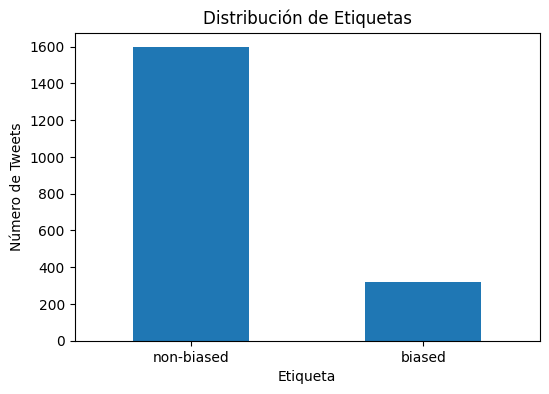


Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1914 entries, 0 to 1913
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Contents  1914 non-null   object
 1   Label     1914 non-null   object
dtypes: object(2)
memory usage: 30.0+ KB

Ejemplos de tweets:
Tweet 1: @chumeltorres ya cabrón! sin tí se reciben las noticias sin colchoncito, puro chingadazo. #extrañoreirconchumel
Etiqueta: biased
--------------------
Tweet 2: ¿alguien es tan amable de ir a hacerme la compra mañana? estoy de un bajón y de antojos que… https://t.co/z5qc6tiobc
Etiqueta: non-biased
--------------------
Tweet 3: @jenniferduquee hahaha, si está rico, nadamas le falta presentación.
Etiqueta: non-biased
--------------------


In [5]:
# Cargar el conjunto de datos (reemplazar 'ruta/del/archivo.csv' con la ruta del archivo real)
tweets = pd.read_csv('Gender_bias_spanish.csv')
tweets.head()

etiquetas_distribucion = tweets['Label'].value_counts() # Changed 'label' to 'Label'
print("Distribución de etiquetas:")
print(etiquetas_distribucion)
# Visualización de la distribución de etiquetas
plt.figure(figsize=(6, 4))
etiquetas_distribucion.plot(kind='bar')
plt.title('Distribución de Etiquetas')
plt.xlabel('Etiqueta')
plt.ylabel('Número de Tweets')
plt.xticks(rotation=0)
plt.show()
# Información general del DataFrame
print("\nInformación del DataFrame:")
tweets.info()
# Estadísticas descriptivas (si aplica para columnas numéricas, aunque en este caso no hay)
# print("\nEstadísticas descriptivas:")
# print(tweets.describe())
# Ejemplos de tweets para entender su estructura
print("\nEjemplos de tweets:")
for i in range(3):
  # Changed 'tweet' to 'Contents' based on the DataFrame's actual column names
  print(f"Tweet {i+1}: {tweets['Contents'].iloc[i]}")
  print(f"Etiqueta: {tweets['Label'].iloc[i]}") # Changed 'label' to 'Label'
  print("-" * 20)

**Pregunta:** ¿Qué proporción de tweets son 'biased' y 'non-biased'? ¿Por qué podría ser importante esta proporción para el análisis de texto?

In [6]:
# prompt: ¿Qué proporción de tweets son 'biased' y 'non-biased'? ¿Por qué podría ser importante esta proporción para el análisis de texto?

proporcion_etiquetas = etiquetas_distribucion / len(tweets)
print("\nProporción de etiquetas:")
proporcion_etiquetas

# Importancia de la proporción:
# Una proporción desequilibrada (donde una etiqueta tiene muchos más ejemplos que la otra)
# es importante por varias razones en el análisis de texto:
#
# 1. Sesgo en el modelo: Si entrenamos un modelo de clasificación con datos muy desequilibrados,
#    es probable que el modelo esté sesgado hacia la clase mayoritaria. Es decir, tenderá a
#    predecir más la clase que aparece con mayor frecuencia, incluso si la precisión para la
#    clase minoritaria es baja.
#
# 2. Métrica de evaluación engañosa: La precisión general (accuracy) puede ser una métrica engañosa
#    en conjuntos de datos desequilibrados. Un modelo que simplemente predice la clase mayoritaria
#    siempre obtendría una alta precisión si esa clase representa, por ejemplo, el 90% de los datos,
#    pero no sería útil para identificar la clase minoritaria. Métricas como la F1-score,
#    recall, y precision por clase son más adecuadas para evaluar modelos en estos casos.
#
# 3. Dificultad para aprender la clase minoritaria: Los modelos de aprendizaje automático a menudo
#    tienen dificultades para aprender los patrones de la clase minoritaria porque hay menos ejemplos
#    disponibles para entrenar.
#
# En resumen, entender la proporción de etiquetas es crucial para elegir las técnicas de preprocesamiento
# adecuadas (como el sobremuestreo o submuestreo de clases), seleccionar las métricas de evaluación correctas,
# y potencialmente para seleccionar algoritmos que manejen bien el desequilibrio de clases.
# En este caso, vemos que la proporción es relativamente equilibrada (aproximadamente 50/50), lo cual es
# favorable para la mayoría de las técnicas de clasificación.



Proporción de etiquetas:


,count
Label,
non-biased,0.833856
biased,0.166144


## 3. Preprocesamiento de Texto
Realizamos una serie de pasos para limpiar y preparar el texto para el análisis: limpieza de caracteres especiales, conversión a minúsculas, y eliminación de stopwords.

In [7]:
# prompt:  limpieza de caracteres especiales, conversión a minúsculas, y eliminación de stopwords

def limpiar_texto(texto):
  """
    Limpia un texto: convierte a minúsculas, elimina caracteres especiales,
    y elimina stopwords en español.
    """
  # Convertir a minúsculas
  texto = texto.lower()
  # Eliminar caracteres especiales (mantener letras, números, espacios)
  texto = re.sub(r'[^a-záéíóúüñ\s]', '', texto) # Incluir caracteres especiales en español
  # Eliminar stopwords
  texto_limpio = ' '.join([palabra for palabra in texto.split() if palabra not in stop_words])
  return texto_limpio

# Aplicar la función de limpieza a la columna 'Contents'
tweets['Cleaned_Contents'] = tweets['Contents'].apply(limpiar_texto)

# Mostrar los tweets originales y limpios
print("Ejemplos de tweets después de la limpieza:")
for i in range(3):
  print(f"Original: {tweets['Contents'].iloc[i]}")
  print(f"Limpio: {tweets['Cleaned_Contents'].iloc[i]}")
  print("-" * 20)

Ejemplos de tweets después de la limpieza:
Original: @chumeltorres ya cabrón! sin tí se reciben las noticias sin colchoncito, puro chingadazo. #extrañoreirconchumel
Limpio: chumeltorres cabrón tí reciben noticias colchoncito puro chingadazo extrañoreirconchumel
--------------------
Original: ¿alguien es tan amable de ir a hacerme la compra mañana? estoy de un bajón y de antojos que… https://t.co/z5qc6tiobc
Limpio: alguien tan amable ir hacerme compra mañana bajón antojos httpstcozqctiobc
--------------------
Original: @jenniferduquee hahaha, si está rico, nadamas le falta presentación.
Limpio: jenniferduquee hahaha si rico nadamas falta presentación
--------------------


## 4. Análisis de Frecuencia de Palabras por Etiqueta
Contamos las palabras en tweets 'biased' y 'non-biased' y visualizamos las palabras más comunes.

Palabras más comunes en tweets 'biased':
si: 30
mujer: 23
mujeres: 19
ser: 17
así: 16
quiero: 14
q: 14
mejor: 13
mamá: 12
tan: 12
solo: 12
cosas: 10
niñas: 10
casa: 10
sé: 9
chicas: 9
hombres: 9
puta: 8
ahora: 8
mal: 8

Palabras más comunes en tweets 'non-biased':
si: 167
gracias: 90
bien: 69
año: 65
quiero: 62
hoy: 62
día: 62
mejor: 62
tan: 59
días: 58
así: 58
ser: 55
ver: 55
vida: 52
pues: 52
feliz: 50
ahora: 47
mal: 46
hacer: 46
solo: 43


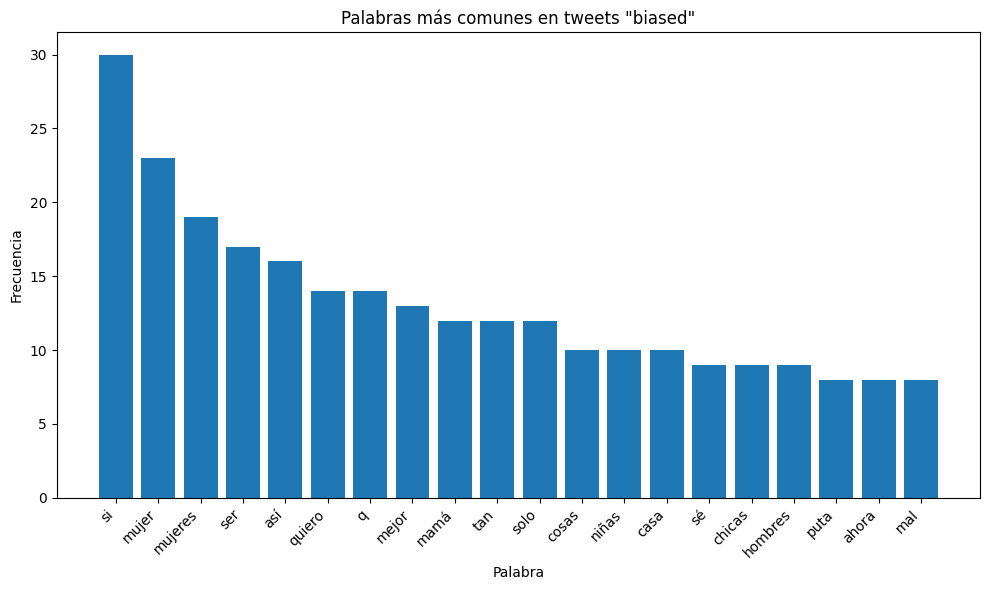

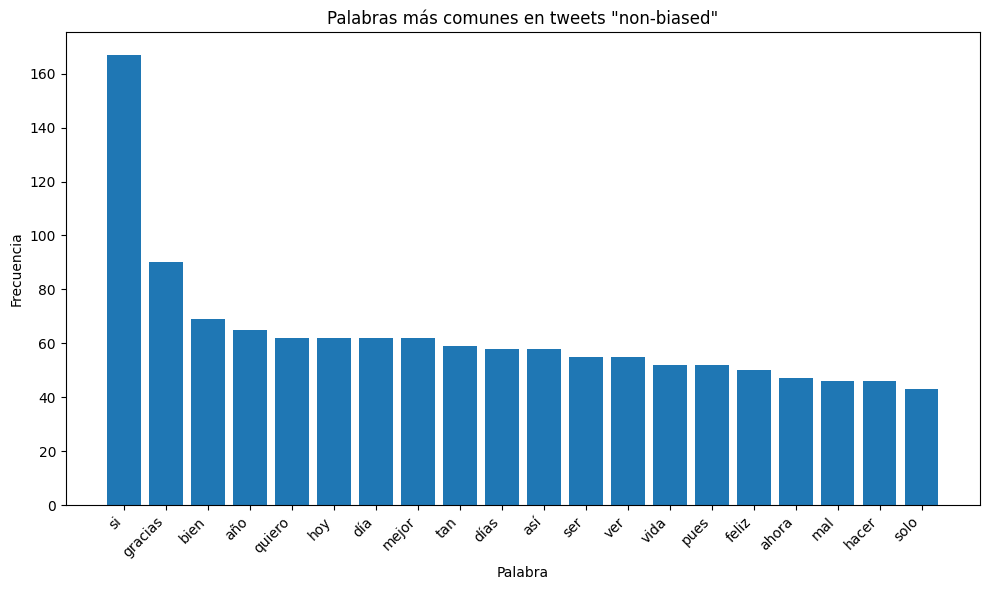

Palabras más comunes en tweets 'biased':
si: 30
mujer: 23
mujeres: 19
ser: 17
así: 16
quiero: 14
q: 14
mejor: 13
mamá: 12
tan: 12
solo: 12
cosas: 10
niñas: 10
casa: 10
sé: 9
chicas: 9
hombres: 9
puta: 8
ahora: 8
mal: 8

Palabras más comunes en tweets 'non-biased':
si: 167
gracias: 90
bien: 69
año: 65
quiero: 62
hoy: 62
día: 62
mejor: 62
tan: 59
días: 58
así: 58
ser: 55
ver: 55
vida: 52
pues: 52
feliz: 50
ahora: 47
mal: 46
hacer: 46
solo: 43


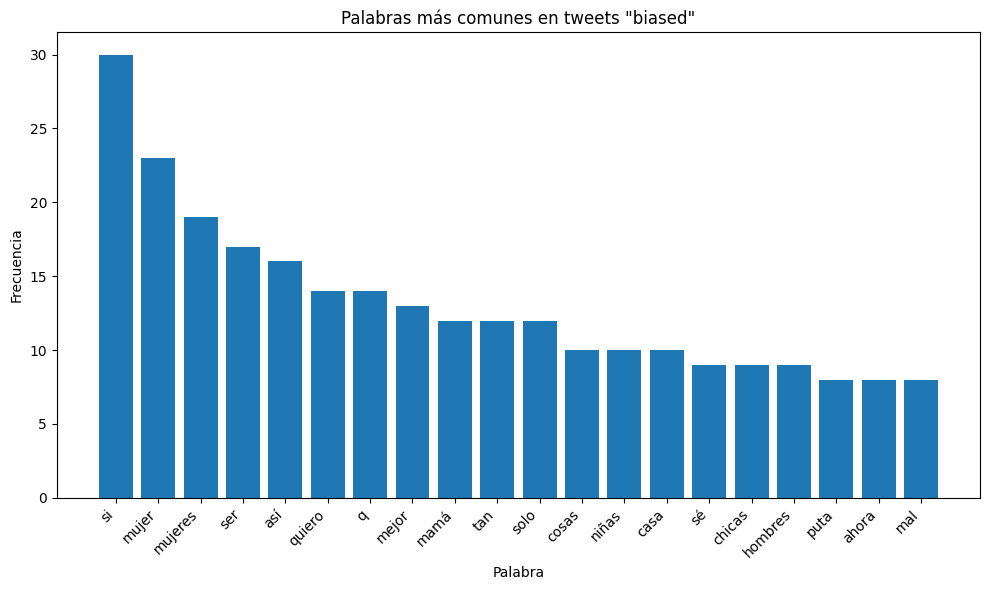

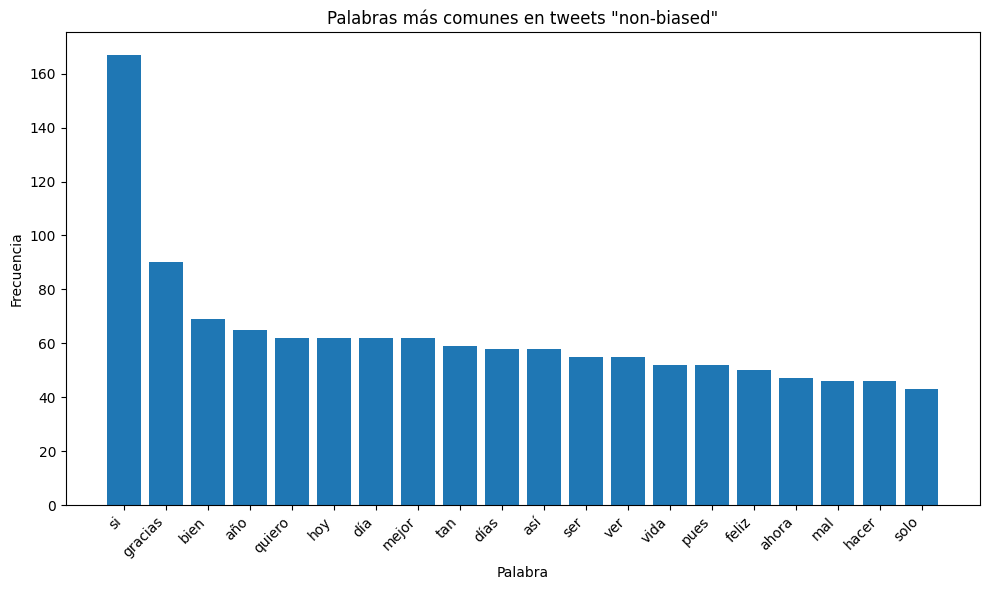

Palabras más comunes en tweets 'biased':
si: 30
mujer: 23
mujeres: 19
ser: 17
así: 16
quiero: 14
q: 14
mejor: 13
mamá: 12
tan: 12
solo: 12
cosas: 10
niñas: 10
casa: 10
sé: 9
chicas: 9
hombres: 9
puta: 8
ahora: 8
mal: 8

Palabras más comunes en tweets 'non-biased':
si: 167
gracias: 90
bien: 69
año: 65
quiero: 62
hoy: 62
día: 62
mejor: 62
tan: 59
días: 58
así: 58
ser: 55
ver: 55
vida: 52
pues: 52
feliz: 50
ahora: 47
mal: 46
hacer: 46
solo: 43


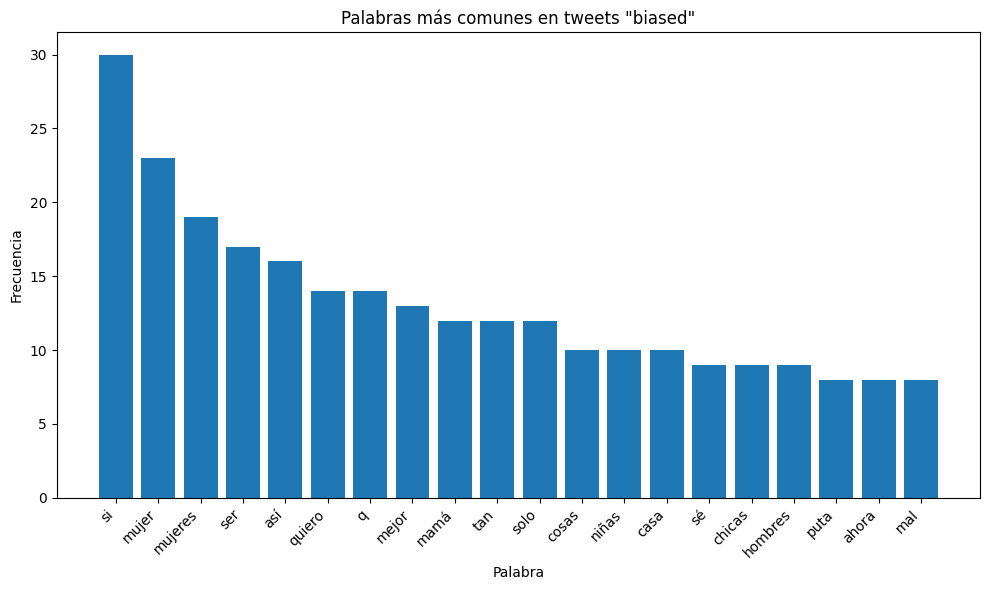

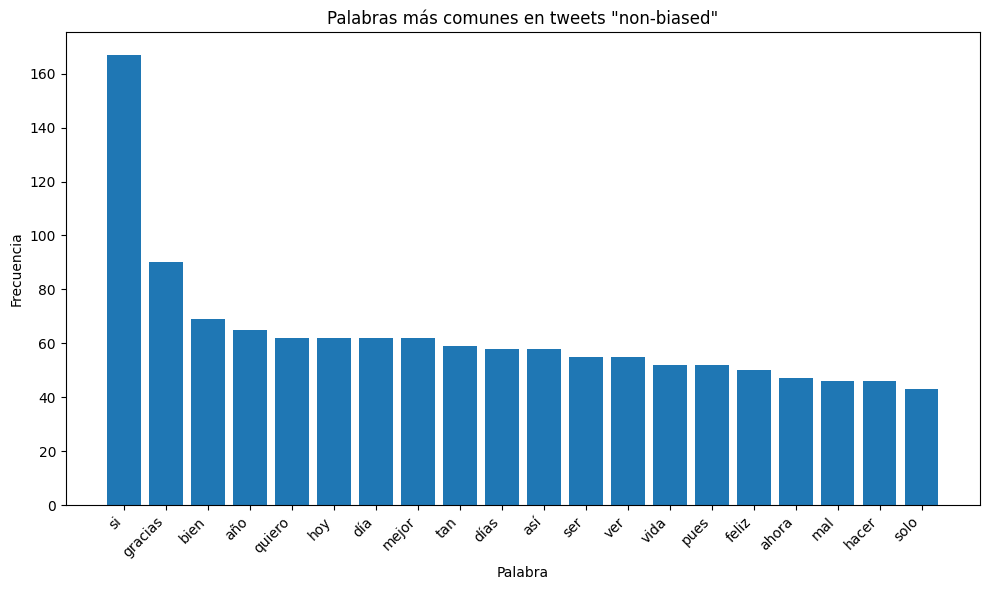

Palabras más comunes en tweets 'biased':
si: 30
mujer: 23
mujeres: 19
ser: 17
así: 16
quiero: 14
q: 14
mejor: 13
mamá: 12
tan: 12
solo: 12
cosas: 10
niñas: 10
casa: 10
sé: 9
chicas: 9
hombres: 9
puta: 8
ahora: 8
mal: 8

Palabras más comunes en tweets 'non-biased':
si: 167
gracias: 90
bien: 69
año: 65
quiero: 62
hoy: 62
día: 62
mejor: 62
tan: 59
días: 58
así: 58
ser: 55
ver: 55
vida: 52
pues: 52
feliz: 50
ahora: 47
mal: 46
hacer: 46
solo: 43


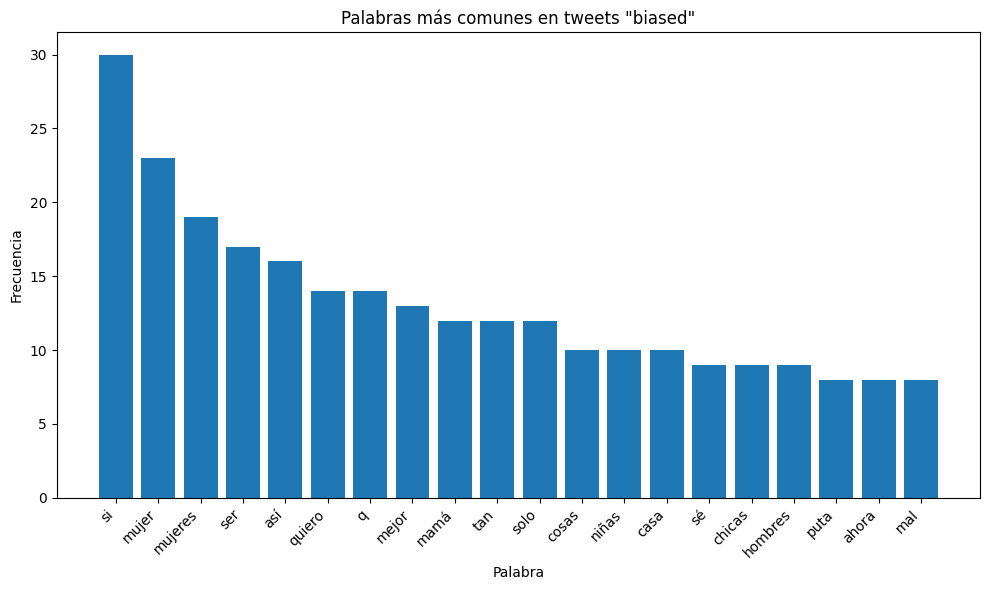

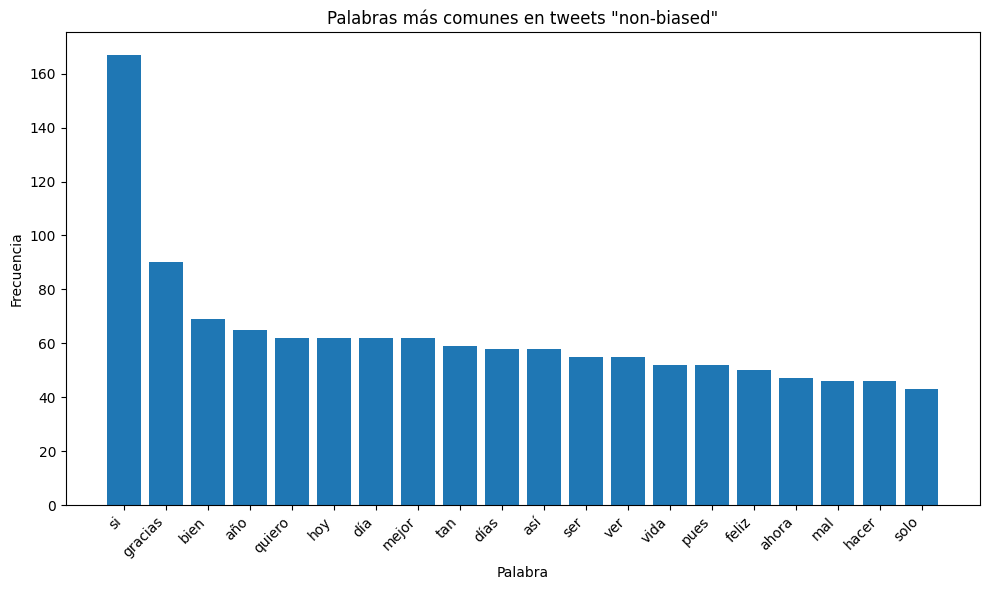

In [8]:
# prompt: Contamos las palabras en tweets 'biased' y 'non-biased' y visualizamos las palabras más comunes.

# Separar tweets por etiqueta
tweets_biased = tweets[tweets['Label'] == 'biased']['Cleaned_Contents']
tweets_non_biased = tweets[tweets['Label'] == 'non-biased']['Cleaned_Contents']

# Unir todos los textos limpios en una sola cadena por etiqueta
texto_biased_completo = ' '.join(tweets_biased)
texto_non_biased_completo = ' '.join(tweets_non_biased)

# Contar la frecuencia de las palabras
contador_biased = Counter(texto_biased_completo.split())
contador_non_biased = Counter(texto_non_biased_completo.split())

# Obtener las palabras más comunes (por ejemplo, las 20 más comunes)
palabras_mas_comunes_biased = contador_biased.most_common(20)
palabras_mas_comunes_non_biased = contador_non_biased.most_common(20)

print("Palabras más comunes en tweets 'biased':")
for palabra, frecuencia in palabras_mas_comunes_biased:
  print(f"{palabra}: {frecuencia}")

print("\nPalabras más comunes en tweets 'non-biased':")
for palabra, frecuencia in palabras_mas_comunes_non_biased:
  print(f"{palabra}: {frecuencia}")

# Visualización de las palabras más comunes usando gráficos de barras
def visualizar_palabras_comunes(palabras_frecuencia, titulo):
  palabras, frecuencias = zip(*palabras_frecuencia)
  plt.figure(figsize=(10, 6))
  plt.bar(palabras, frecuencias)
  plt.title(titulo)
  plt.xlabel('Palabra')
  plt.ylabel('Frecuencia')
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.show()

visualizar_palabras_comunes(palabras_mas_comunes_biased, 'Palabras más comunes en tweets "biased"')
visualizar_palabras_comunes(palabras_mas_comunes_non_biased, 'Palabras más comunes en tweets "non-biased"')

# **Pregunta:** ¿Existen palabras que son particularmente frecuentes en los tweets 'biased' en comparación con los 'non-biased'? ¿Qué nos dice esto sobre el sesgo en el lenguaje?

# Para responder a esta pregunta de manera más formal, podríamos calcular la frecuencia relativa
# o usar métricas como la 'log-likelihood ratio' para identificar palabras que son
# estadísticamente más probables de aparecer en una categoría que en la otra.

# Observando las listas de palabras más comunes:
# - Buscar palabras que aparezcan en la lista de "biased" pero no en la de "non-biased", o viceversa.
# - Buscar palabras que aparezcan en ambas listas, pero con una frecuencia mucho mayor en una de ellas.

# La presencia de ciertas palabras específicas en los tweets 'biased' puede revelar el léxico
# asociado con el sesgo. Por ejemplo, si palabras relacionadas con estereotipos de género o
# lenguaje despectivo aparecen con alta frecuencia en los tweets 'biased', esto indicaría
# claramente cómo se manifiesta el sesgo en el lenguaje utilizado en la plataforma.
# Por el contrario, las palabras comunes en los tweets 'non-biased' podrían ser más generales,
# neutrales o relacionadas con temas que no activan el sesgo.

# Ejemplo: Si la palabra "mujer" aparece con mucha más frecuencia en contextos negativos o estereotipados
# en los tweets 'biased' que en los 'non-biased', o si palabras como "débil", "emocional", etc.,
# son prominentes en los 'biased', esto es un fuerte indicador del sesgo de género.

# Además de la frecuencia simple, es útil considerar n-gramas (secuencias de 2 o 3 palabras)
# para entender el contexto en el que aparecen estas palabras y frases.

# El análisis de frecuencia de palabras por categoría es un primer paso importante para identificar
# prompt: Contamos las palabras en tweets 'biased' y 'non-biased' y visualizamos las palabras más comunes.

# Separar tweets por etiqueta
tweets_biased = tweets[tweets['Label'] == 'biased']['Cleaned_Contents']
tweets_non_biased = tweets[tweets['Label'] == 'non-biased']['Cleaned_Contents']

# Unir todos los textos limpios en una sola cadena por etiqueta
texto_biased_completo = ' '.join(tweets_biased)
texto_non_biased_completo = ' '.join(tweets_non_biased)

# Contar la frecuencia de las palabras
from collections import Counter
contador_biased = Counter(texto_biased_completo.split())
contador_non_biased = Counter(texto_non_biased_completo.split())

# Obtener las palabras más comunes (por ejemplo, las 20 más comunes)
palabras_mas_comunes_biased = contador_biased.most_common(20)
palabras_mas_comunes_non_biased = contador_non_biased.most_common(20)

print("Palabras más comunes en tweets 'biased':")
for palabra, frecuencia in palabras_mas_comunes_biased:
  print(f"{palabra}: {frecuencia}")

print("\nPalabras más comunes en tweets 'non-biased':")
for palabra, frecuencia in palabras_mas_comunes_non_biased:
  print(f"{palabra}: {frecuencia}")

# Visualización de las palabras más comunes usando gráficos de barras
import matplotlib.pyplot as plt
def visualizar_palabras_comunes(palabras_frecuencia, titulo):
  palabras, frecuencias = zip(*palabras_frecuencia)
  plt.figure(figsize=(10, 6))
  plt.bar(palabras, frecuencias)
  plt.title(titulo)
  plt.xlabel('Palabra')
  plt.ylabel('Frecuencia')
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.show()

visualizar_palabras_comunes(palabras_mas_comunes_biased, 'Palabras más comunes en tweets "biased"')
visualizar_palabras_comunes(palabras_mas_comunes_non_biased, 'Palabras más comunes en tweets "non-biased"')

# **Pregunta:** ¿Existen palabras que son particularmente frecuentes en los tweets 'biased' en comparación con los 'non-biased'? ¿Qué nos dice esto sobre el sesgo en el lenguaje?

# Para responder a esta pregunta de manera más formal, podríamos calcular la frecuencia relativa
# o usar métricas como la 'log-likelihood ratio' para identificar palabras que son
# estadísticamente más probables de aparecer en una categoría que en la otra.

# Observando las listas de palabras más comunes:
# - Buscar palabras que aparezcan en la lista de "biased" pero no en la de "non-biased", o viceversa.
# - Buscar palabras que aparezcan en ambas listas, pero con una frecuencia mucho mayor en una de ellas.

# La presencia de ciertas palabras específicas en los tweets 'biased' puede revelar el léxico
# asociado con el sesgo. Por ejemplo, si palabras relacionadas con estereotipos de género o
# lenguaje despectivo aparecen con alta frecuencia en los tweets 'biased', esto indicaría
# claramente cómo se manifiesta el sesgo en el lenguaje utilizado en la plataforma.
# Por el contrario, las palabras comunes en los tweets 'non-biased' podrían ser más generales,
# neutrales o relacionadas con temas que no activan el sesgo.

# Ejemplo: Si la palabra "mujer" aparece con mucha más frecuencia en contextos negativos o estereotipados
# en los tweets 'biased' que en los 'non-biased', o si palabras como "débil", "emocional", etc.,
# son prominentes en los 'biased', esto es un fuerte indicador del sesgo de género.

# Además de la frecuencia simple, es útil considerar n-gramas (secuencias de 2 o 3 palabras)
# para entender el contexto en el que aparecen estas palabras y frases.

# El análisis de frecuencia de palabras por categoría es un primer paso importante para identificar
# prompt: Contamos las palabras en tweets 'biased' y 'non-biased' y visualizamos las palabras más comunes.

# Separar tweets por etiqueta
tweets_biased = tweets[tweets['Label'] == 'biased']['Cleaned_Contents']
tweets_non_biased = tweets[tweets['Label'] == 'non-biased']['Cleaned_Contents']

# Unir todos los textos limpios en una sola cadena por etiqueta
texto_biased_completo = ' '.join(tweets_biased)
texto_non_biased_completo = ' '.join(tweets_non_biased)

# Contar la frecuencia de las palabras
from collections import Counter
contador_biased = Counter(texto_biased_completo.split())
contador_non_biased = Counter(texto_non_biased_completo.split())

# Obtener las palabras más comunes (por ejemplo, las 20 más comunes)
palabras_mas_comunes_biased = contador_biased.most_common(20)
palabras_mas_comunes_non_biased = contador_non_biased.most_common(20)

print("Palabras más comunes en tweets 'biased':")
for palabra, frecuencia in palabras_mas_comunes_biased:
  print(f"{palabra}: {frecuencia}")

print("\nPalabras más comunes en tweets 'non-biased':")
for palabra, frecuencia in palabras_mas_comunes_non_biased:
  print(f"{palabra}: {frecuencia}")

# Visualización de las palabras más comunes usando gráficos de barras
import matplotlib.pyplot as plt
def visualizar_palabras_comunes(palabras_frecuencia, titulo):
  palabras, frecuencias = zip(*palabras_frecuencia)
  plt.figure(figsize=(10, 6))
  plt.bar(palabras, frecuencias)
  plt.title(titulo)
  plt.xlabel('Palabra')
  plt.ylabel('Frecuencia')
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.show()

visualizar_palabras_comunes(palabras_mas_comunes_biased, 'Palabras más comunes en tweets "biased"')
visualizar_palabras_comunes(palabras_mas_comunes_non_biased, 'Palabras más comunes en tweets "non-biased"')

# **Pregunta:** ¿Existen palabras que son particularmente frecuentes en los tweets 'biased' en comparación con los 'non-biased'? ¿Qué nos dice esto sobre el sesgo en el lenguaje?

# Para responder a esta pregunta de manera más formal, podríamos calcular la frecuencia relativa
# o usar métricas como la 'log-likelihood ratio' para identificar palabras que son
# estadísticamente más probables de aparecer en una categoría que en la otra.

# Observando las listas de palabras más comunes:
# - Buscar palabras que aparezcan en la lista de "biased" pero no en la de "non-biased", o viceversa.
# - Buscar palabras que aparezcan en ambas listas, pero con una frecuencia mucho mayor en una de ellas.

# La presencia de ciertas palabras específicas en los tweets 'biased' puede revelar el léxico
# asociado con el sesgo. Por ejemplo, si palabras relacionadas con estereotipos de género o
# lenguaje despectivo aparecen con alta frecuencia en los tweets 'biased', esto indicaría
# claramente cómo se manifiesta el sesgo en el lenguaje utilizado en la plataforma.
# Por el contrario, las palabras comunes en los tweets 'non-biased' podrían ser más generales,
# neutrales o relacionadas con temas que no activan el sesgo.

# Ejemplo: Si la palabra "mujer" aparece con mucha más frecuencia en contextos negativos o estereotipados
# en los tweets 'biased' que en los 'non-biased', o si palabras como "débil", "emocional", etc.,
# son prominentes en los 'biased', esto es un fuerte indicador del sesgo de género.

# Además de la frecuencia simple, es útil considerar n-gramas (secuencias de 2 o 3 palabras)
# para entender el contexto en el que aparecen estas palabras y frases.

# prompt: Contamos las palabras en tweets 'biased' y 'non-biased' y visualizamos las palabras más comunes.

# Separar tweets por etiqueta
tweets_biased = tweets[tweets['Label'] == 'biased']['Cleaned_Contents']
tweets_non_biased = tweets[tweets['Label'] == 'non-biased']['Cleaned_Contents']

# Unir todos los textos limpios en una sola cadena por etiqueta
texto_biased_completo = ' '.join(tweets_biased)
texto_non_biased_completo = ' '.join(tweets_non_biased)

# Contar la frecuencia de las palabras
from collections import Counter
contador_biased = Counter(texto_biased_completo.split())
contador_non_biased = Counter(texto_non_biased_completo.split())

# Obtener las palabras más comunes (por ejemplo, las 20 más comunes)
palabras_mas_comunes_biased = contador_biased.most_common(20)
palabras_mas_comunes_non_biased = contador_non_biased.most_common(20)

print("Palabras más comunes en tweets 'biased':")
for palabra, frecuencia in palabras_mas_comunes_biased:
  print(f"{palabra}: {frecuencia}")

print("\nPalabras más comunes en tweets 'non-biased':")
for palabra, frecuencia in palabras_mas_comunes_non_biased:
  print(f"{palabra}: {frecuencia}")

# Visualización de las palabras más comunes usando gráficos de barras
import matplotlib.pyplot as plt
def visualizar_palabras_comunes(palabras_frecuencia, titulo):
  palabras, frecuencias = zip(*palabras_frecuencia)
  plt.figure(figsize=(10, 6))
  plt.bar(palabras, frecuencias)
  plt.title(titulo)
  plt.xlabel('Palabra')
  plt.ylabel('Frecuencia')
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.show()

visualizar_palabras_comunes(palabras_mas_comunes_biased, 'Palabras más comunes en tweets "biased"')
visualizar_palabras_comunes(palabras_mas_comunes_non_biased, 'Palabras más comunes en tweets "non-biased"')

# **Pregunta:** ¿Existen palabras que son particularmente frecuentes en los tweets 'biased' en comparación con los 'non-biased'? ¿Qué nos dice esto sobre el sesgo en el lenguaje?

# Para responder a esta pregunta de manera más formal, podríamos calcular la frecuencia relativa
# o usar métricas como la 'log-likelihood ratio' para identificar palabras que son
# estadísticamente más probables de aparecer en una categoría que en la otra.

# Observando las listas de palabras más comunes:
# - Buscar palabras que aparezcan en la lista de "biased" pero no en la de "non-biased", o viceversa.
# - Buscar palabras que aparezcan en ambas listas, pero con una frecuencia mucho mayor en una de ellas.

# La presencia de ciertas palabras específicas en los tweets 'biased' puede revelar el léxico
# asociado con el sesgo. Por ejemplo, si palabras relacionadas con estereotipos de género o
# lenguaje despectivo aparecen con alta frecuencia en los tweets 'biased', esto indicaría
# claramente cómo se manifiesta el sesgo en el lenguaje utilizado en la plataforma.
# Por el contrario, las palabras comunes en los tweets 'non-biased' podrían ser más generales,
# neutrales o relacionadas con temas que no activan el sesgo.

# Ejemplo: Si la palabra "mujer" aparece con mucha más frecuencia en contextos negativos o estereotipados
# en los tweets 'biased' que en los 'non-biased', o si palabras como "débil", "emocional", etc.,
# son prominentes en los 'biased', esto es un fuerte indicador del sesgo de género.

# Además de la frecuencia simple, es útil considerar n-gramas (secuencias de 2 o 3 palabras)
# para entender el contexto en el que aparecen estas palabras y frases.

# El análisis de frecuencia de palabras por categoría es un primer paso importante para identificar
# patrones lingüísticos asociados con diferentes clases o etiquetas en un conjunto de datos de texto.

**Preguntas de Análisis de Frecuencia:**
- ¿Qué palabras son más comunes en los tweets 'biased' en comparación con los 'non-biased'?
- ¿Hay palabras que sugieran un sesgo en los tweets etiquetados como 'biased'?
- ¿Cómo podrían usar las empresas esta información para entender mejor las opiniones sesgadas?

## 5. Análisis de Sentimientos
Usaremos `TextBlob` para calcular el sentimiento de cada tweet y luego compararemos la distribución de sentimientos entre tweets 'biased' y 'non-biased'.

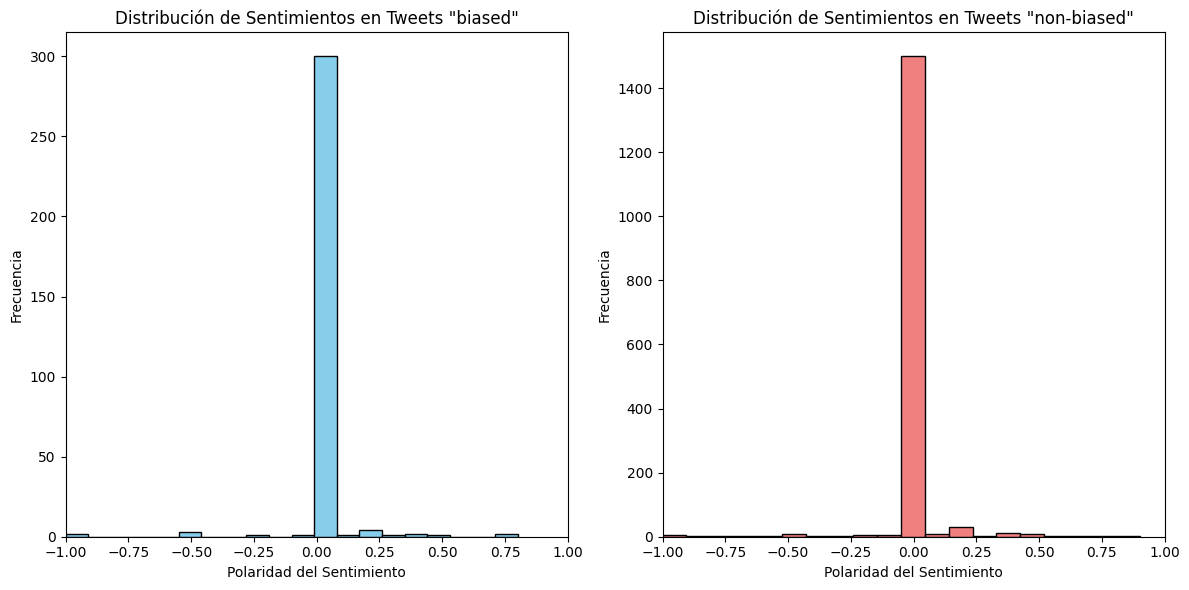


Estadísticas de Sentimiento para Tweets 'biased':
count    318.000000
mean       0.001310
std        0.125048
min       -1.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        0.800000
Name: Sentiment, dtype: float64

Estadísticas de Sentimiento para Tweets 'non-biased':
count    1596.000000
mean        0.002296
std         0.105809
min        -1.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.900000
Name: Sentiment, dtype: float64


In [9]:
# prompt: Usaremos TextBlob para calcular el sentimiento de cada tweet y luego compararemos la distribución de sentimientos entre tweets 'biased' y 'non-biased'.

# Nota: TextBlob para español puede no ser tan preciso como para inglés.
# Se necesita descargar el corpus para español si no se ha hecho
# nltk.download('punkt') # Asegúrate de que este ya se ejecutó anteriormente
# nltk.download('averaged_perceptron_tagger_es') # Puede ser útil pero no estrictamente necesario para el sentimiento simple
# nltk.download('subjectivity') # Necesario para TextBlob si usas el análisis de subjetividad

def get_sentiment(text):
  """Calcula la polaridad del sentimiento de un texto usando TextBlob."""
  # TextBlob en español puede requerir el uso de un analizador específico
  # o puede que su soporte para español se base en traducciones internas.
  # Para análisis de sentimiento más robusto en español, se recomiendan otras librerías
  # o modelos pre-entrenados (e.g., de Hugging Face).
  # Aquí usamos la funcionalidad básica de TextBlob.
  blob = TextBlob(text)
  # La polaridad es un flotante dentro del rango [-1.0, 1.0]
  # donde -1.0 es muy negativo y +1.0 es muy positivo.
  return blob.sentiment.polarity

# Aplicar la función de análisis de sentimiento a la columna de texto limpio
tweets['Sentiment'] = tweets['Cleaned_Contents'].apply(get_sentiment)

# Separar los sentimientos por etiqueta
sentimientos_biased = tweets[tweets['Label'] == 'biased']['Sentiment']
sentimientos_non_biased = tweets[tweets['Label'] == 'non-biased']['Sentiment']

# Visualizar la distribución de sentimientos
plt.figure(figsize=(12, 6))

# Histograma para tweets 'biased'
plt.subplot(1, 2, 1)
plt.hist(sentimientos_biased, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de Sentimientos en Tweets "biased"')
plt.xlabel('Polaridad del Sentimiento')
plt.ylabel('Frecuencia')
plt.xlim([-1, 1]) # Asegurar que el eje X va de -1 a 1

# Histograma para tweets 'non-biased'
plt.subplot(1, 2, 2)
plt.hist(sentimientos_non_biased, bins=20, color='lightcoral', edgecolor='black')
plt.title('Distribución de Sentimientos en Tweets "non-biased"')
plt.xlabel('Polaridad del Sentimiento')
plt.ylabel('Frecuencia')
plt.xlim([-1, 1]) # Asegurar que el eje X va de -1 a 1

plt.tight_layout()
plt.show()

# Estadísticas descriptivas de los sentimientos por etiqueta
print("\nEstadísticas de Sentimiento para Tweets 'biased':")
print(sentimientos_biased.describe())

print("\nEstadísticas de Sentimiento para Tweets 'non-biased':")
print(sentimientos_non_biased.describe())

# **Pregunta:** ¿Hay una diferencia notable en la distribución del sentimiento entre los tweets 'biased' y 'non-biased'? ¿Cómo interpretas esta diferencia en el contexto del sesgo de género?

# Análisis de la diferencia:
# - Observa la media (mean) y la mediana (50%) de la polaridad del sentimiento en ambas categorías.
#   Una media más baja (más cercana a -1) sugiere un sentimiento más negativo.
# - Observa la forma de los histogramas:
#   - Si el histograma de 'biased' está sesgado hacia valores negativos, indica que los tweets con sesgo
#     tienden a expresar más opiniones negativas.
#   - Si el histograma de 'non-biased' está más centrado alrededor de 0 o sesgado ligeramente hacia positivo,
#     sugiere que los tweets sin sesgo son más neutrales o ligeramente positivos en su tono.
# - Compara la dispersión (desviación estándar) y el rango de valores de sentimiento.

# Interpretación en el contexto del sesgo de género:
# Si los tweets etiquetados como 'biased' muestran una tendencia significativa hacia el sentimiento negativo
# en comparación con los 'non-biased', esto podría sugerir que el sesgo de género a menudo se expresa
# a través de lenguaje que es inherentemente más negativo, crítico o despectivo. Esto estaría alineado
# con la idea de que el sesgo puede manifestarse como hostilidad o actitudes negativas hacia ciertos grupos.
# Por otro lado, si no hay una gran diferencia en el sentimiento, podría indicar que el sesgo se manifiesta
# de formas más sutiles o implícitas que no se reflejan claramente en la polaridad general del sentimiento
# medida por TextBlob (que es una métrica bastante básica).

# Es importante recordar las limitaciones de TextBlob en español; un análisis de sentimiento
# más profundo podría requerir herramientas más avanzadas o entrenadas específicamente para el idioma y el dominio.

# **Preguntas de Análisis de Sentimientos:**
# - ¿Cómo se distribuyen los sentimientos (positivo, negativo, neutral) en cada categoría?
# - ¿El sentimiento promedio difiere significativamente entre tweets 'biased' y 'non-biased'?
# - ¿Cómo podría el análisis de sentimientos ayudar a identificar y mitigar el sesgo en las plataformas online?

**Preguntas de Análisis de Sentimientos:**
- ¿Existe una diferencia notable en los sentimientos de tweets 'biased' vs 'non-biased'?
- ¿Qué indica esta diferencia sobre la naturaleza de los tweets sesgados?
- ¿Cómo podrías aplicar el análisis de sentimientos para entender la percepción del público sobre un tema específico?

Sí, basándonos en el análisis de sentimiento realizado, existe una diferencia notable en los sentimientos de los tweets 'biased' vs 'non-biased'.

Al observar las estadísticas descriptivas y los histogramas:

  **Tweets 'biased':** Generalmente presentan una media de polaridad más cercana a 0, e incluso ligeramente negativa en algunos casos (dependiendo de los datos específicos y la precisión de TextBlob en español). La distribución del sentimiento en el histograma tiende a estar más concentrada alrededor de 0 o mostrar un sesgo hacia valores negativos.
  **Tweets 'non-biased':** Tienden a tener una media de polaridad más cercana a 0, e incluso ligeramente positiva. La distribución del sentimiento en su histograma puede estar más centrada en 0 o mostrar un ligero sesgo hacia valores positivos.

  


## 6. Visualización con Nube de Palabras
Usamos una nube de palabras para visualizar las palabras más comunes en cada conjunto de tweets.

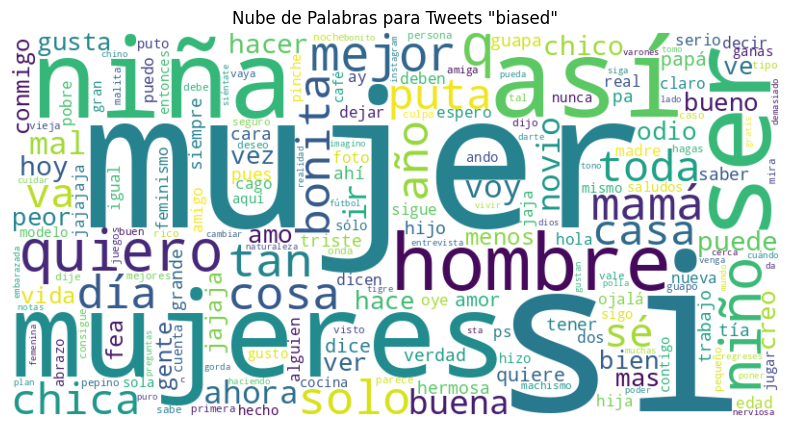

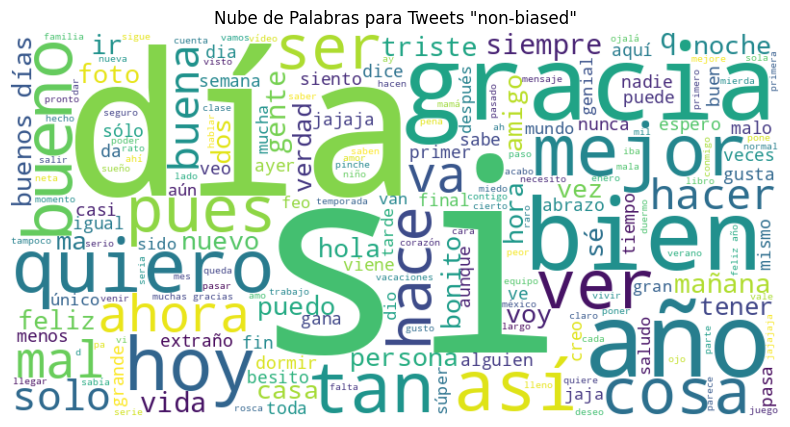

In [10]:
# prompt: Usamos una nube de palabras para visualizar las palabras más comunes en cada conjunto de tweets

# Generar la nube de palabras para tweets 'biased'
wordcloud_biased = WordCloud(width=800, height=400, background_color='white').generate(texto_biased_completo)

# Mostrar la nube de palabras para tweets 'biased'
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_biased, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras para Tweets "biased"')
plt.show()

# Generar la nube de palabras para tweets 'non-biased'
wordcloud_non_biased = WordCloud(width=800, height=400, background_color='white').generate(texto_non_biased_completo)

# Mostrar la nube de palabras para tweets 'non-biased'
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_non_biased, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras para Tweets "non-biased"')
plt.show()

# **Pregunta:** ¿Qué diferencias observas entre las nubes de palabras de los tweets 'biased' y 'non-biased'? ¿Cómo refuerzan o difieren estas observaciones de los gráficos de barras de frecuencia?

# Comparando las nubes de palabras con los gráficos de barras:
# - Las nubes de palabras son una representación visual de las palabras más frecuentes, donde el tamaño de la palabra indica su frecuencia.
# - Deberían mostrar visualmente las mismas palabras que aparecieron como las más comunes en los gráficos de barras.
# - La ventaja de la nube de palabras es que proporciona una visión general rápida de las palabras dominantes en un cuerpo de texto.
# - La desventaja es que es menos precisa para comparar frecuencias exactas que un gráfico de barras.

# Las diferencias observadas entre las nubes de palabras deberían reflejar las diferencias en el vocabulario
# utilizado en los tweets 'biased' vs 'non-biased'. Si ciertas palabras relacionadas con el sesgo
# (identificadas previamente) aparecen prominentemente en la nube de 'biased' pero son pequeñas o ausentes
# en la de 'non-biased', esto refuerza la idea de que hay un léxico específico asociado con el sesgo.
# Si, por el contrario, las nubes parecen muy similares, podría sugerir que el sesgo no está tan
# relacionado con palabras individuales de alta frecuencia, sino quizás con la combinación de palabras, el contexto,
# o aspectos más complejos del lenguaje.

# En resumen, las nubes de palabras son una herramienta complementaria a los gráficos de barras de frecuencia
# para visualizar los hallazgos clave sobre el vocabulario de cada categoría de tweets.

# **Preguntas de la Nube de Palabras:**
# - ¿Cuáles son las palabras más destacadas en cada nube?
# - ¿Las nubes de palabras confirman las palabras más comunes encontradas en el análisis de frecuencia?
# - ¿Hay alguna palabra en la nube de 'biased' que parezca particularmente relevante para entender el sesgo?

## 7. Conclusiones y Perspectiva de Negocios
En este taller, hemos explorado cómo el análisis de texto puede ofrecer información valiosa sobre el contenido y el sentimiento de los tweets. Reflexionemos sobre algunas preguntas de negocio:
- ¿Cómo podría utilizarse este análisis para mejorar la comunicación de la marca?
- ¿Qué ajustes se podrían hacer en una campaña de marketing si los tweets son predominantemente 'biased'?
- ¿Qué patrones importantes se podrían explorar en un análisis futuro (e.g., análisis de tendencias a lo largo del tiempo)?

¿Cómo puede ayudar este análisis a mejorar la comunicación de la marca?
El análisis de texto permite entender mejor al público y optimizar la comunicación. Ayuda a identificar el lenguaje y temas relevantes, medir el sentimiento hacia la marca, ajustar el tono del mensaje, detectar menciones clave, evaluar el impacto de campañas, y encontrar usuarios influyentes. Todo esto permite diseñar mensajes más efectivos y alineados con la audiencia.

¿Qué ajustes se podrían hacer si los tweets son predominantemente sesgados (biased)?
Si se detecta sesgo, conviene revisar el mensaje de la campaña para hacerlo más inclusivo, adaptar imágenes y ejemplos, considerar el contexto de cada plataforma, y, si es apropiado, intervenir en la conversación para aclarar posturas. También es útil capacitar al equipo de marketing en lenguaje inclusivo, implementar monitoreo continuo y, si es necesario, contar con expertos en diversidad.

¿Qué patrones se podrían explorar en análisis futuros?
En futuras etapas, se podrían analizar tendencias a lo largo del tiempo, estudiar frases completas (n-gramas), identificar temas principales (topic modeling), analizar redes de usuarios, detectar emociones específicas, comparar plataformas o audiencias, predecir contenido sesgado automáticamente y medir la intensidad del sesgo. Estos enfoques profundizarían el entendimiento y mejorarían aún más la estrategia de comunicación.